## Introduction

In this report, I applied JPEG compression to four given grayscale images and observe the changes in frequency domain. The implementation of the algorithm is based on the assignment pdf and course slides. I divided the images in 8 x 8 blocks and for each block, I applied Discrete Cosine Transformation (DCT) and then compressed each block using the given quantization tables. After the quantization made, each block is decompressed by using inverse DCT.
After the compression of images are done, I saved raw data on the file path and zip the files in order the compare file sizes. Another analysis is done by comparing the images in frequency space. In order to compare these images with the compressed ones in frequency domain, I applied Fast Forier Transform (FFT) to the images and discuss frequency changes.

### Necessary Functions

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# FUNCTIONS

def ForierTransform(img):

    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))

    return magnitude_spectrum


def SubPlotImages(img, f_img, desc):

    plt.subplot(121), plt.imshow(img, cmap='gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(f_img, cmap='gray')
    plt.title(desc), plt.xticks([]), plt.yticks([])
    plt.show()


def showImage(img, name="image"):
    cv2.imshow('image', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


def GetNumberOfBlocks(img, block_size):

    row = np.size(img, 0)
    col = np.size(img, 1)

    return int((np.ceil(row / block_size)) * (np.ceil(col / block_size)))


def DCT(block):

    #    block = cv2.normalize(block, block, 0, 255, cv2.NORM_MINMAX)
    dct = cv2.dct(block)
    dct = np.round(a=dct, decimals=0)

    return dct


def IDCT(block):
    idct = cv2.idct(block)
    idct = np.round(a=idct, decimals=0)

    return idct


def Quantize(block, q_table):

    return np.round(a=(block / q_table), decimals=0)



### THE JPEG COMPRESSION FUNCTION

def toJPEG(img, block_size, q_table):

    row = np.size(img, 0)
    col = np.size(img, 1)

    jpeg_image = np.zeros((row, col))

    for i in range(0, (row - 1) - block_size, block_size):

        for j in range(0, (col - 1) - block_size, block_size):

            temp = img[i:i + block_size, j:j + block_size] - 128

            temp = DCT(temp)
#                temp = cv2.normalize(temp, temp, 0, 255, cv2.NORM_MINMAX)

            temp = Quantize(temp, q_table)
            temp = IDCT(temp)
            jpeg_image[i:i + block_size, j:j + block_size] = temp
#                blocks.append(temp)

    jpeg_image = cv2.normalize(jpeg_image, jpeg_image, 0, 255, cv2.NORM_MINMAX)

    return np.round(a=jpeg_image, decimals=0)

### Read Images

In [2]:
img_1 = np.float32(cv2.imread('Bear_Finland.png', 0))
img_2 = np.float32(cv2.imread('60state.png', 0))
img_3 = np.float32(cv2.imread('naturepng.png', 0))
img_4 = np.float32(cv2.imread('pattern.png', 0))


### Define Quantization Tables

In [3]:
quant_50 = np.float32(np.array([[16,11,10,16,24,40,51,61],
                     [12,12,14,19,26,58,60,55],
                     [14,13,16,24,40,57,69,56 ],
                     [14,17,22,29,51,87,80,62],
                     [18,22,37,56,68,109,103,77],
                     [24,35,55,64,81,104,113,92],
                     [49,64,78,87,103,121,120,101],
                     [72,92,95,98,112,100,103,99]]))

quant_10 = np.float32(np.array([[80,60,50,80,120,200,255,255],
                   [55,60,50,80,120,200,255,255],
                   [70,65,80,120,200,255,255,255],
                   [70,85,110,145,255,255,255,255],
                   [90,110,185,255,255,255,255,255],
                   [120,175,255,255,255,255,255,255],
                   [245,255,255,255,255,255,255,255],
                   [255,255,255,255,255,255,255,255]]))

quant_90 = np.float32(np.array([[3,2,2,3,5,8,10,12],
                    [2,2,3,4,5,12,12,11],
                    [3,3,3,5,8,11,14,11],
                    [3,3,4,6,10,17,16,12],
                    [4,4,7,11,14,22,21,15],
                    [5,7,11,13,16,12,23,18],
                    [10,13,16,17,21,24,24,21],
                    [14,18,19,20,22,20,20,20]]))


#print('Q50 = \n',quant_50, '\n')
#print('Q10 = \n',quant_10, '\n')
#print('Q90 = \n',quant_90)

### Compression of Images

Compression of the images are done by the toJPEG() function in the necessary Functions section. The algorithm works as follows;

- For each 8 x 8 blok;
    
        1) Apply DCT.
        2) Quantize according to given quantization table.
        3) Apply Inverse DCT.


- Apply Normalization

In [4]:
block_size = 8

## JPEG IMAGES ACCORDING TO QUANTIZATION TABLES

q10_img1 = toJPEG(img_1, block_size, quant_10)
q10_img2 = toJPEG(img_2, block_size, quant_10)
q10_img3 = toJPEG(img_3, block_size, quant_10)
q10_img4 = toJPEG(img_4, block_size, quant_10)

q50_img1 = toJPEG(img_1, block_size, quant_50)
q50_img2 = toJPEG(img_2, block_size, quant_50)
q50_img3 = toJPEG(img_3, block_size, quant_50)
q50_img4 = toJPEG(img_4, block_size, quant_50)

q90_img1 = toJPEG(img_1, block_size, quant_90)
q90_img2 = toJPEG(img_2, block_size, quant_90)
q90_img3 = toJPEG(img_3, block_size, quant_90)
q90_img4 = toJPEG(img_4, block_size, quant_90)


#### Below, I saved compressed images to the file path in order to compare the sizes

Firstly, I save the images again as png in order to see if the images are constructed. The images are constructed in different qualities according to quantization tables used. Despite I also saved the images as png, the size of the images decreased.

### Observations

- I observed that compressions with Q10 table has the least size. Since the numbers in the table are too big, most of the details are dissapeared after the compression and quality decreases.

- I observed that compressions with Q90 table has the best quality. Since the numbers in the table are too small, most of the details are preserved after the compression and quality does not degenerate too much. As a trade off, the size did not get too much smaller.


In [5]:
## SAVE THE IMAGES 

cv2.imwrite('q10_img1.png', q10_img1)
cv2.imwrite('q10_img2.png', q10_img2)
cv2.imwrite('q10_img3.png', q10_img3)
cv2.imwrite('q10_img4.png', q10_img4)

cv2.imwrite('q50_img1.png', q50_img1)
cv2.imwrite('q50_img2.png', q50_img2)
cv2.imwrite('q50_img3.png', q50_img3)
cv2.imwrite('q50_img4.png', q50_img4)

cv2.imwrite('q90_img1.png', q90_img1)
cv2.imwrite('q90_img2.png', q90_img2)
cv2.imwrite('q90_img3.png', q90_img3)
cv2.imwrite('q90_img4.png', q90_img4)

np.save('img_1', img_1)
np.save('q10_img1', q10_img1)
np.save('q50_img1', q50_img1)
np.save('q90_img1', q90_img1)

np.save('img_2', img_2)
np.save('q10_img2', q10_img2)
np.save('q50_img2', q50_img2)
np.save('q90_img2', q90_img2)

np.save('img_3', img_3)
np.save('q10_img3', q10_img3)
np.save('q50_img3', q50_img3)
np.save('q90_img3', q90_img3)

np.save('img_4', img_4)
np.save('q10_img4', q10_img4)
np.save('q50_img4', q50_img4)
np.save('q90_img4', q90_img4)


In [6]:
# Forier Transform to Original and Compressed Images

f_img_1 = ForierTransform(img_1)
f_img_2 = ForierTransform(img_2)
f_img_3 = ForierTransform(img_3)
f_img_4 = ForierTransform(img_4)

forier_q10_img1 = ForierTransform(q10_img1)
forier_q10_img2 = ForierTransform(q10_img2)
forier_q10_img3 = ForierTransform(q10_img3)
forier_q10_img4 = ForierTransform(q10_img4)

forier_q50_img1 = ForierTransform(q50_img1)
forier_q50_img2 = ForierTransform(q50_img2)
forier_q50_img3 = ForierTransform(q50_img3)
forier_q50_img4 = ForierTransform(q50_img4)

forier_q90_img1 = ForierTransform(q90_img1)
forier_q90_img2 = ForierTransform(q90_img2)
forier_q90_img3 = ForierTransform(q90_img3)
forier_q90_img4 = ForierTransform(q90_img4)



## Images and Forier Bases

In order to observe the frequency changes after compression, I apply Fast Forier Transform (FFT) to the images.

### Observations

- As it can be seen from the frequency domain of Q10, Q50 and Q90 compressions, the details are  increasing respectively.

- In compression with Q90, most of the details are preserved.

- In compression with Q50, average details are preserved.

- In compression with Q10, most of the details are lost.

### Image 1 ("Bear_Finland")

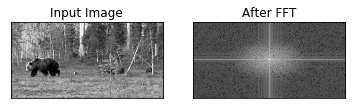

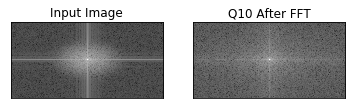

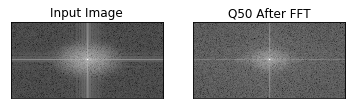

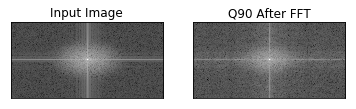

In [7]:
SubPlotImages(img_1, f_img_1, "After FFT")
SubPlotImages(f_img_1, forier_q10_img1, "Q10 After FFT")
SubPlotImages(f_img_1, forier_q50_img1, "Q50 After FFT")
SubPlotImages(f_img_1, forier_q90_img1, "Q90 After FFT")

### Image 2 ("60state")

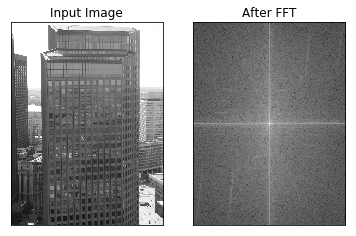

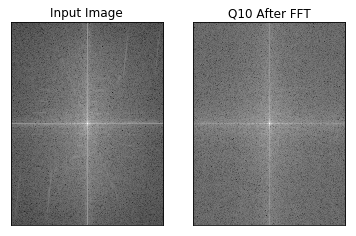

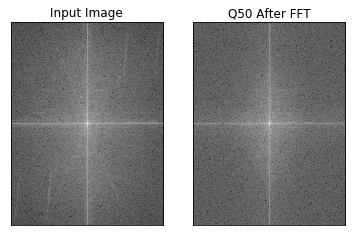

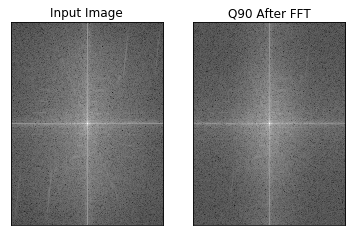

In [8]:
SubPlotImages(img_2, f_img_2, "After FFT")
SubPlotImages(f_img_2, forier_q10_img2, "Q10 After FFT")
SubPlotImages(f_img_2, forier_q50_img2, "Q50 After FFT")
SubPlotImages(f_img_2, forier_q90_img2, "Q90 After FFT")

### Image 3 ("naturepng")

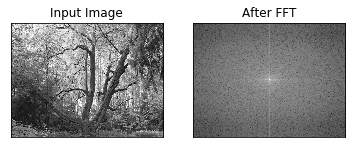

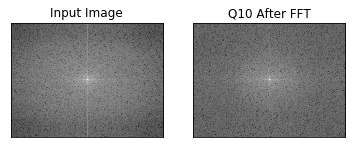

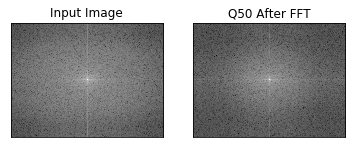

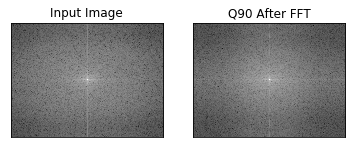

In [9]:
SubPlotImages(img_3, f_img_3, "After FFT")
SubPlotImages(f_img_3, forier_q10_img3, "Q10 After FFT")
SubPlotImages(f_img_3, forier_q50_img3, "Q50 After FFT")
SubPlotImages(f_img_3, forier_q90_img3, "Q90 After FFT")

### Image 4 ("pattern")

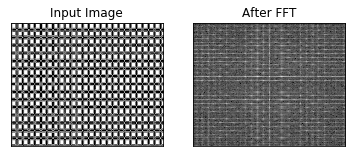

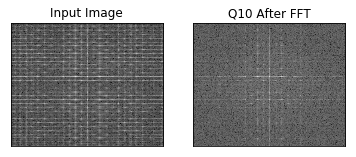

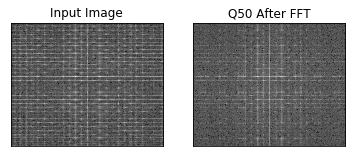

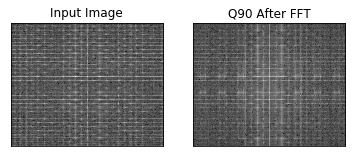

In [10]:
SubPlotImages(img_4, f_img_4, "After FFT")
SubPlotImages(f_img_4, forier_q10_img4, "Q10 After FFT")
SubPlotImages(f_img_4, forier_q50_img4, "Q50 After FFT")
SubPlotImages(f_img_4, forier_q90_img4, "Q90 After FFT")